In [1]:
%matplotlib notebook

In [2]:
# ignore some warning messages before importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Code source: Gael Varoquaux
# Modified for documentation by Jaques Grobler, Yang Han
# License: BSD 3 clause

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd

In [4]:
# this is a classification problem
# predict the species of an iris using the measurements

# import some data to play with
iris = datasets.load_iris()

## Visualizing the Iris Dataset

The rows are the samples, the columns are measurements (features).
There are 4 features per sample.

In [5]:
pd.DataFrame(
    data= iris['data'], 
    columns= iris['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# visualize the data with the input features and target output/label (iris species) side-by-side

pd.DataFrame(
    data= np.c_[iris['data'], 
                iris['target'], 
                iris['target_names'][iris['target']]
               ],
    columns= iris['feature_names'] + ['target', 'target_name']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Preparing Data

**Exercise:** Load the input features (data) from iris dataset to `X`.

In [7]:
# X: sepal length, sepal width, 
#    petal length, petal width

### START CODE HERE ###
X = iris['data']
### END CODE HERE ###

# show the first 5 rows, and all columns of the iris features
X[0:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**Expected Output**: 

```
array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])
```

For plotting graph later, we only consider the first 2 features (sepal length, sepal width) for now.

**Exercise:** Filter out only the first 2 features for `X`.

In [8]:
### START CODE HERE ###
X = X[:,:2]
### END CODE HERE ###

# show the first 5 rows of X 
X[0:5,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

**Expected Output**: 

```
array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6```

**Exercise:** Load the target output to `y`.

In [9]:
### START CODE HERE ###
y = iris['target']
### END CODE HERE ###

# show first 5 rows of the iris species
# all of the 5 samples belong to target 0 (setosa)
y[0:5]

array([0, 0, 0, 0, 0])

**Expected Output**: 

```
array([0, 0, 0, 0, 0])```

Split the dataset into training data and test data. The data is divided randomly. 80% of the data goes to training dataset, 20% of the data goes to test dataset. ```random_state``` is set to fix the seed used by the random number generator for randomly dividing the dataset.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

**Exercise:** Load a LogisticRegression model from `sklearn.linear_model` to `logreg`.

In [11]:
### START CODE HERE ###
logreg = LogisticRegression()
### END CODE HERE ###

logreg

LogisticRegression()

**Expected Output**: 

```
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
```

**Exercise:** Fit the LogisticRegression model to the training data.

In [12]:
### START CODE HERE ###
logreg.fit(X_train, y_train)
### END CODE HERE ###

LogisticRegression()

**Expected Output**: 

```
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
```

**Exercise:** Use the LogisticRegression model to do prediction on the training data, and store the result in `y_predicted`.

In [13]:
### START CODE HERE ###
y_predicted = logreg.predict(X_train)
### END CODE HERE ###

y_predicted

array([2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2])

**Expected Output**: 

```
array([2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 2])
```

**Exercise:** Compute the percentage of correct predictions on training data.

Hint: Use the `accuracy_score` method from `sklearn.metrics`.

In [14]:
### START CODE HERE ###
acc = accuracy_score(y_predicted, y_train)

acc
### END CODE HERE ###

0.8

**Expected Output**: 

```
0.7833333333333333
```

**Exercise:** Use the LogisticRegression model to do prediction on the test data, and store the result in `y_predicted`.

In [15]:
### START CODE HERE ###
y_predicted = logreg.predict(X_test)
### END CODE HERE ###

y_predicted

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

**Expected Output**: 

```
array([2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0])
```

**Exercise:** Compute the percentage of correct predictions on test data.

Hint: Use the `accuracy_score` method from `sklearn.metrics`.

In [16]:
### START CODE HERE ###
acc = accuracy_score(y_predicted, y_test)

acc
### END CODE HERE ###

0.8666666666666667

**Expected Output**: 

```
0.8333333333333334
```

# Visualizing the Result

In [17]:
# make predictions for each point (x1, x2)
# where x1 in the range of sepal length
#       x2 in the range of sepal width
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<IPython.core.display.Javascript object>


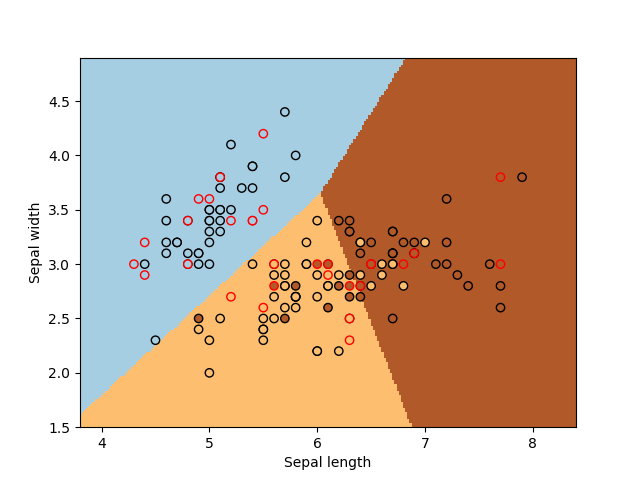

In [18]:
# plot the decision boundary
# decision boundary partitions the two-dimensional 
# space into 3 sets, each representing for one species

# we will assign a color to each point
# in the mesh [x_min, x_max] x [y_min, y_max]

fig = plt.figure()

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# put the result into a color plot
# show regions with different color
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# plot the training points (with black edges)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolors='k', cmap=plt.cm.Paired)

# plot the test points (with red edges)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
            edgecolors='r', cmap=plt.cm.Paired)


## Improving The Training Model

At this point, you can try to use all of the 4 features for training, and you can get up to around **95%** accuracy! Note that because the input features will have 4 dimensions and thus cannot be plotted on a 2D or 3D graph.

You can also try to set a higher `C` value for the LogisticRegression, to penalize wrongly classified data more.
e.g. 
```
logreg = LogisticRegression(C=1e5)
```

For more tunable parameters, visit the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).